In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.metrics import classification_report

In [7]:
df = pd.read_csv("Fraud_check.csv")

In [8]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
df.shape

(600, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [11]:
df.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [12]:
df.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
YES        Single          99619           86896            29               NO       1
NO         Single          26101           112774           13               NO       1
                           24557           32450            19               YES      1
                           23884           111105           8                YES      1
                           22258           63622            17               NO       1
                                                                                     ..
YES        Married         26972           86169            8                NO       1
                           26793           162777           7                NO       1
                           26741           176050           20               NO       1
                           26679           79683            26               NO       1
NO         Divorced        10329     

In [13]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [14]:
lb = LabelEncoder()

In [15]:
df["Undergrad"]=lb.fit_transform(df["Undergrad"])

In [16]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,YES
1,1,Divorced,33700,134075,18,YES
2,0,Married,36925,160205,30,YES
3,1,Single,50190,193264,15,YES
4,0,Married,81002,27533,28,NO


In [17]:
df.rename({"Marital.Status":"Marital_status"},axis=1,inplace=True)

In [18]:
# Label Encoding the data
df = pd.get_dummies(df,columns=["Marital_status"],drop_first=True)

In [19]:
# Encode the Urban column
df["Urban"] = lb.fit_transform(df["Urban"])

In [20]:
# Rename the Columns
df.rename({"Taxable.Income":"Taxable_income"},axis=1,inplace=True)

In [21]:
df.rename({"City.Population":"City_population"},axis=1,inplace=True)

In [22]:
df.rename({"Work.Experience":"Work_Experience"},axis=1,inplace=True)

In [23]:
df.head()

,Undergrad,Taxable_income,City_population,Work_Experience,Urban,Marital_status_Married,Marital_status_Single
0,0,68833,50047,10,1,0,1
1,1,33700,134075,18,1,0,0
2,0,36925,160205,30,1,1,0
3,1,50190,193264,15,1,0,1
4,0,81002,27533,28,0,1,0


In [24]:
# Get shape of those who has Taxable_income less or equal to 30000
df[df["Taxable_income"] <= 30000].shape

(124, 7)

In [26]:
df["Taxable_income"] =np.where(df["Taxable_income"] <= 30000,'Risky','Good')

In [27]:
# After Replacement Check whether the replaced data has same shape with without replaced data 
df[df["Taxable_income"] == 'Risky'].shape

(124, 7)

In [33]:
df.head()

,Undergrad,Taxable_income,City_population,Work_Experience,Urban,Marital_status_Married,Marital_status_Single
0,0,Good,50047,10,1,0,1
1,1,Good,134075,18,1,0,0
2,0,Good,160205,30,1,1,0
3,1,Good,193264,15,1,0,1
4,0,Good,27533,28,0,1,0


<AxesSubplot:xlabel='Taxable_income', ylabel='count'>

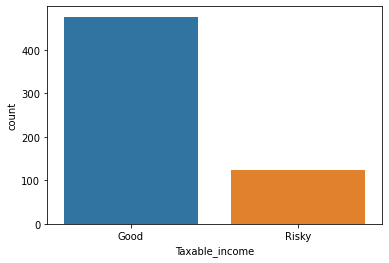

In [28]:
sns.countplot(x=df["Taxable_income"])

In [29]:
# Label Encode the Taxable_income column
df["Taxable_income"] = lb.fit_transform(df["Taxable_income"])

<AxesSubplot:xlabel='Taxable_income', ylabel='count'>

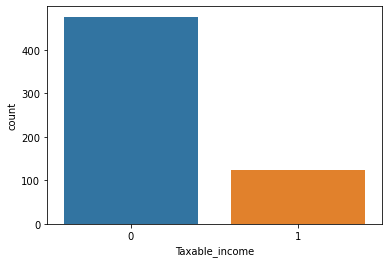

In [30]:
sns.countplot(x=df["Taxable_income"])

In [ ]:
# Alternative 
# df["Taxable_income"]= df.loc[(df["Taxable_income"] <= 30000), 'Taxable_income'] = 'Risky'

<AxesSubplot:xlabel='Undergrad', ylabel='Taxable_income'>

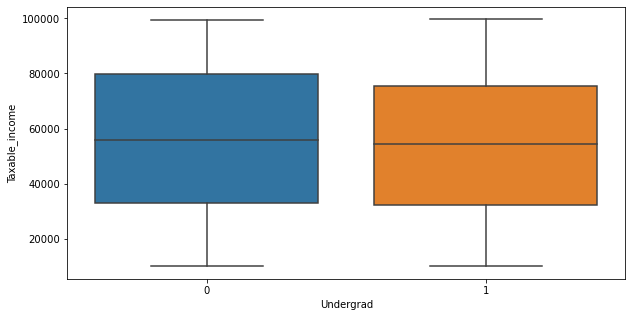

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["Undergrad"], y=df["Taxable_income"])

In [31]:
from sklearn import preprocessing

In [32]:
scale = preprocessing.MinMaxScaler()

In [33]:
data = df.copy()

In [34]:
transform_data = scale.fit_transform(df)

In [35]:
transform_data = pd.DataFrame(transform_data,columns=df.columns)

In [36]:
transform_data.head()

,Undergrad,Taxable_income,City_population,Work_Experience,Urban,Marital_status_Married,Marital_status_Single
0,0.0,0.0,0.139472,0.333333,1.0,0.0,1.0
1,1.0,0.0,0.622394,0.600000,1.0,0.0,0.0
2,0.0,0.0,0.772568,1.000000,1.0,1.0,0.0
3,1.0,0.0,0.962563,0.500000,1.0,0.0,1.0
4,0.0,0.0,0.010081,0.933333,0.0,1.0,0.0


<AxesSubplot:xlabel='Urban', ylabel='count'>

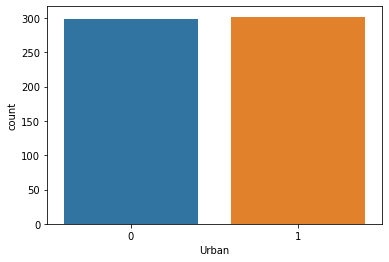

In [37]:
sns.countplot(x = df['Urban'])

In [38]:
transform_data.describe()

,Undergrad,Taxable_income,City_population,Work_Experience,Urban,Marital_status_Married,Marital_status_Single
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,0.206667,0.476832,0.518611,0.503333,0.323333,0.361667
std,0.500017,0.405252,0.286496,0.294738,0.500406,0.468139,0.480884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.236713,0.266667,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.463879,0.500000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.714575,0.800000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
transform_data.shape

(600, 7)

In [ ]:
# Split the data for train and test

In [40]:
X = transform_data.iloc[:,0:]

In [41]:
Y = transform_data.iloc[:,1]

In [42]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

In [53]:
x_test.shape

(120, 7)

In [54]:
y_test.shape

(120,)

# Building Decision Tree Classifier using Entropy Criteria¶

In [44]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

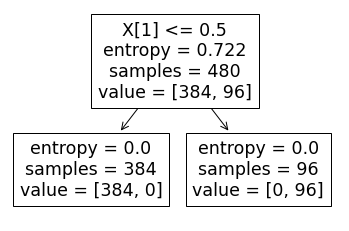

In [46]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

In [47]:
df.head()

,Undergrad,Taxable_income,City_population,Work_Experience,Urban,Marital_status_Married,Marital_status_Single
0,0,0,50047,10,1,0,1
1,1,0,134075,18,1,0,0
2,0,0,160205,30,1,1,0
3,1,0,193264,15,1,0,1
4,0,0,27533,28,0,1,0


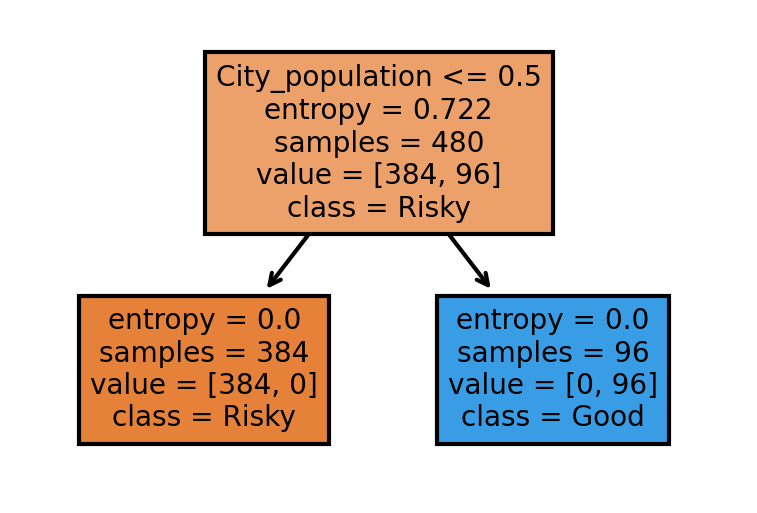

In [51]:
fn=['Undergrad','City_population','Work_Experience','Urban','Marital_status_Married','Marital_status_Single']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [52]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0.0    92
1.0    28
dtype: int64

In [55]:
# check unique label of y_test
y_test.value_counts()

0.0    92
1.0    28
Name: Taxable_income, dtype: int64

Like we see above it predict very well

In [ ]:
# pd.DataFrame({actual_otcome:"y_test",pred :"preds"})

In [57]:
preds

array([0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0.])

In [59]:
print(y_test)

159    0.0
307    0.0
253    0.0
528    0.0
137    1.0
      ... 
102    0.0
577    0.0
18     0.0
560    0.0
62     0.0
Name: Taxable_income, Length: 120, dtype: float64


In [60]:
pd.crosstab(y_test,preds) 

col_0,0.0,1.0
Taxable_income,,
0.0,92,0
1.0,0,28


In [61]:
# Accuracy 
np.mean(preds==y_test)

1.0

Best accuracy

# Building Decision Tree Classifier (CART) using Gini Criteria

In [62]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini')

In [63]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

# Decision Tree Regression Example

<!-- Decision Tree Regression Example -->

In [67]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [69]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [70]:
#Find the accuracy
model.score(X_test,y_test)

1.0